In [ ]:
'''False Alarm Detection system - 
Problem Statement-This project was made for a chemical industry which had sensors installed in various parts of the factory to
detect H2S gas which is hazardous to health. Every time one or multiple sensors detected the H2S leak, an emergency alarm rings
to alert the workers. For every alarm, the industry calls a team which sanitizes the place and checks for the leak and this was
a big cost to the company.
A few of the alarms that ring are not even hazardous. The company gave us the data for each alarm with a final column stating 
the alarm was dangerous or not.''

Columns contains -
Ambient Temperature	Calibration(days)	Unwanted substance deposition (0/1)	Humidity (%)	H2S Content(ppm)	Dangerous (0/1)

The data was first pre-processed and analysis libraries like Numpy and Pandas were used to make it ready to be utilized by a 
machine learning algorithm. Problems like standard scaling, categorical data and missing values were handled with appropriate
techniques. Then, we used LogisticRegression model to make a classifier with first five column as independent columns and 
dangerous column as dependent/target column. 
Now whenever, there is a leakage and the alarm rings, the data is sent to us and we predict if it is dangerous or not.
If found dangerous then only the team is called to sanitize the place and fix the leak. This saved a lot of money for the
company. 
'''

In [65]:
#Step-1- Load the data in dataset and check for NaN values -
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
df=pd.read_excel('C:/Users/om/Desktop/Historical Alarm Cases.xlsx')

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1892 entries, 0 to 1891
Data columns (total 11 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Case No.                            1892 non-null   object 
 1   Ambient Temperature( deg C)         1892 non-null   int64  
 2   Calibration(days)                   1892 non-null   int64  
 3   Unwanted substance deposition(0/1)  1892 non-null   int64  
 4   Humidity(%)                         1892 non-null   int64  
 5   H2S Content(ppm)                    1892 non-null   int64  
 6   detected by(% of sensors)           1892 non-null   int64  
 7   Spuriosity Index(0/1)               1892 non-null   int64  
 8   Unnamed: 8                          0 non-null      float64
 9   Unnamed: 9                          0 non-null      float64
 10  Unnamed: 10                         1 non-null      float64
dtypes: float64(3), int64(7), object(1)
memory u

In [68]:
df.isnull().sum()

Case No.                                 0
Ambient Temperature( deg C)              0
Calibration(days)                        0
Unwanted substance deposition(0/1)       0
Humidity(%)                              0
H2S Content(ppm)                         0
detected by(% of sensors)                0
Spuriosity Index(0/1)                    0
Unnamed: 8                            1892
Unnamed: 9                            1892
Unnamed: 10                           1891
dtype: int64

In [69]:
df.head()

,Case No.,Ambient Temperature( deg C),Calibration(days),Unwanted substance deposition(0/1),Humidity(%),H2S Content(ppm),detected by(% of sensors),Spuriosity Index(0/1),Unnamed: 8,Unnamed: 9,Unnamed: 10
0,Case # 1,-2,226,1,96,9,21,1,NaN,NaN,NaN
1,Case # 2,4,134,1,83,4,77,0,NaN,NaN,NaN
2,Case # 3,7,163,0,69,2,81,0,NaN,NaN,NaN
3,Case # 4,5,162,0,80,6,69,0,NaN,NaN,NaN
4,Case # 5,2,192,1,87,3,67,0,NaN,NaN,NaN


In [70]:
#Step-2- Diiscard the columns whic are non correlated -
df.drop(['Case No.','Unnamed: 8','Unnamed: 9','Unnamed: 10'],axis=1,inplace=True)

In [71]:
df.head()

,Ambient Temperature( deg C),Calibration(days),Unwanted substance deposition(0/1),Humidity(%),H2S Content(ppm),detected by(% of sensors),Spuriosity Index(0/1)
0,-2,226,1,96,9,21,1
1,4,134,1,83,4,77,0
2,7,163,0,69,2,81,0
3,5,162,0,80,6,69,0
4,2,192,1,87,3,67,0


In [72]:
sns.pairplot(df,hue='Spuriosity Index(0/1)')

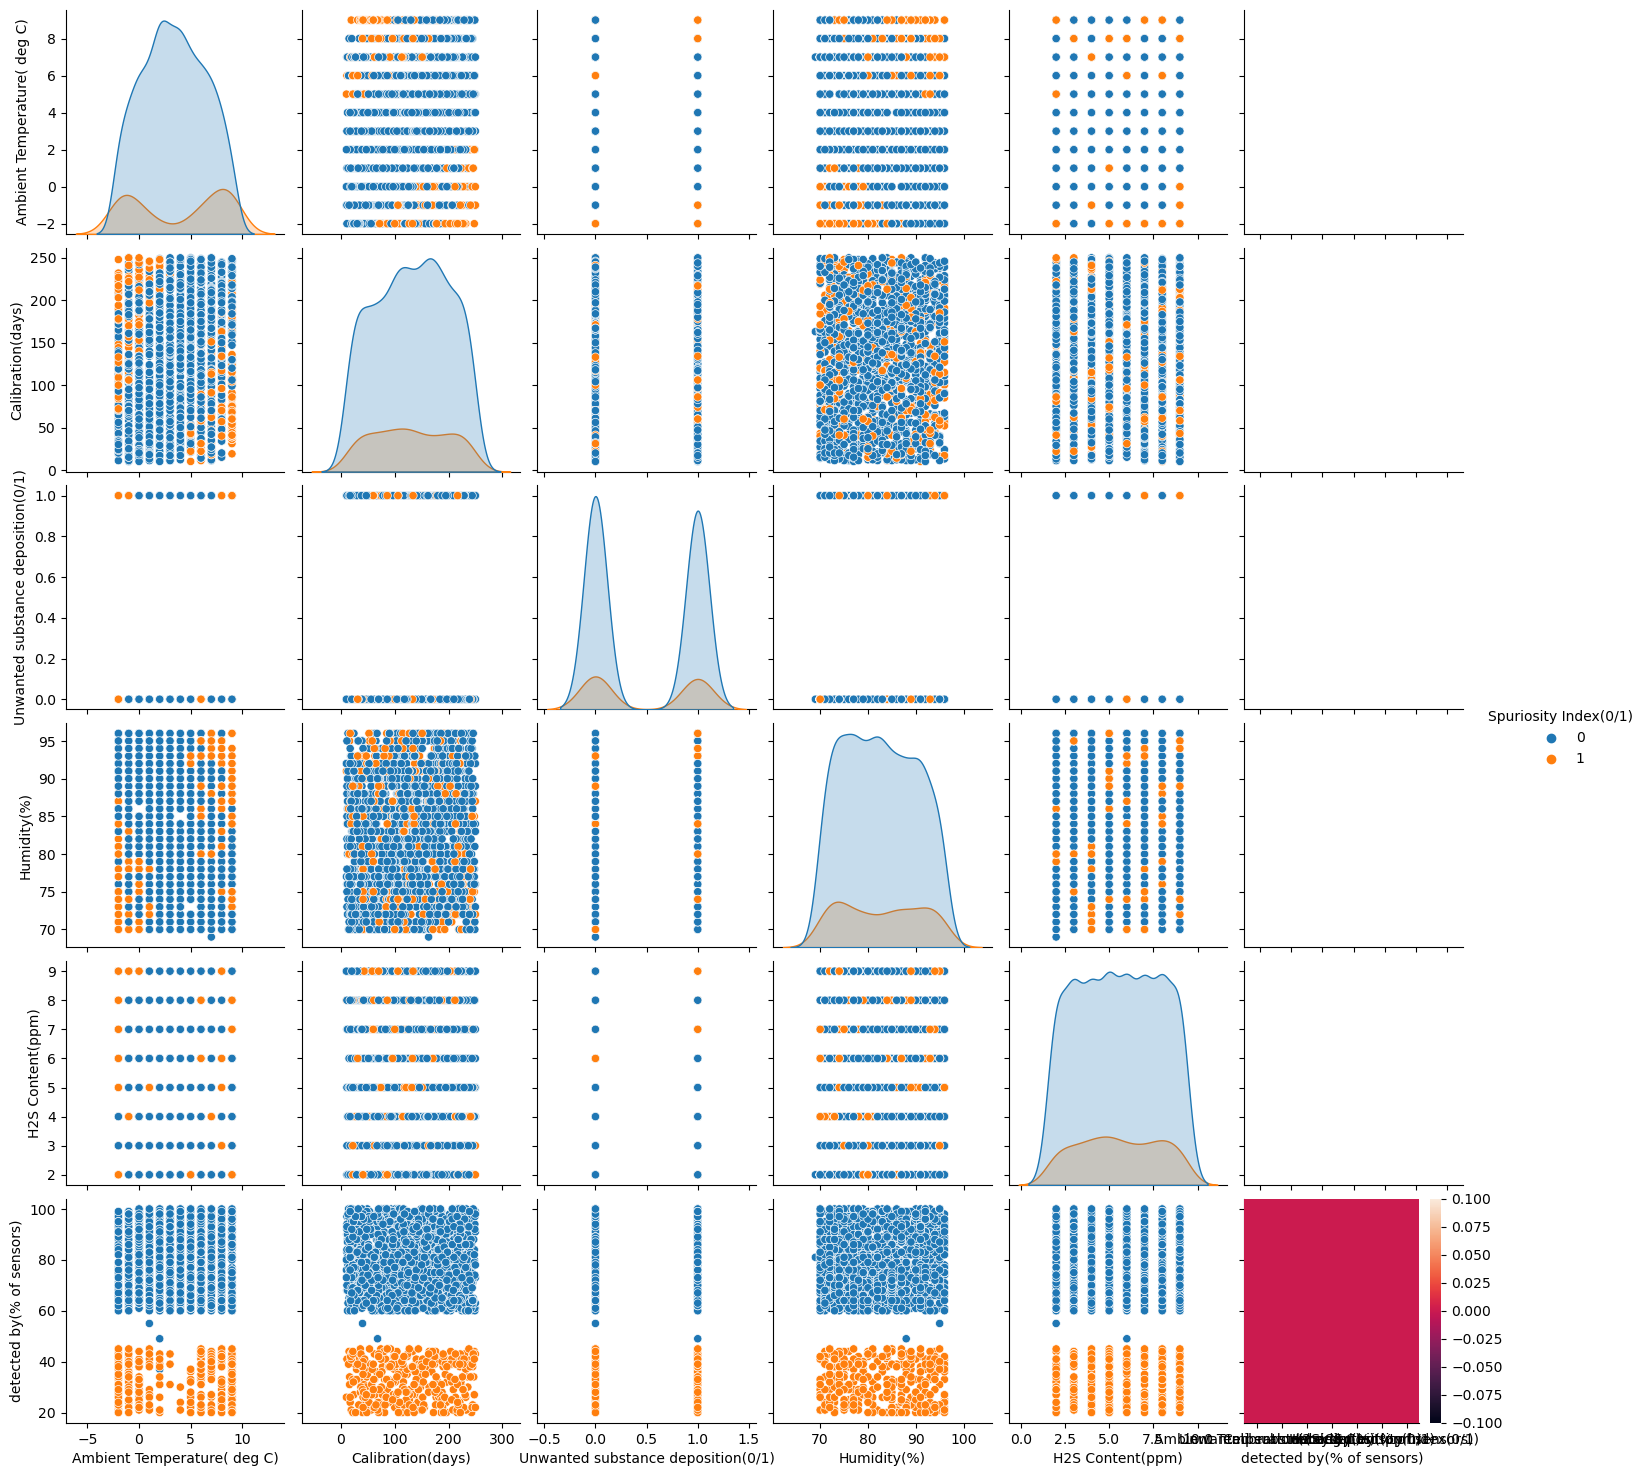

In [73]:
sns.heatmap(df.isnull())
plt.show()

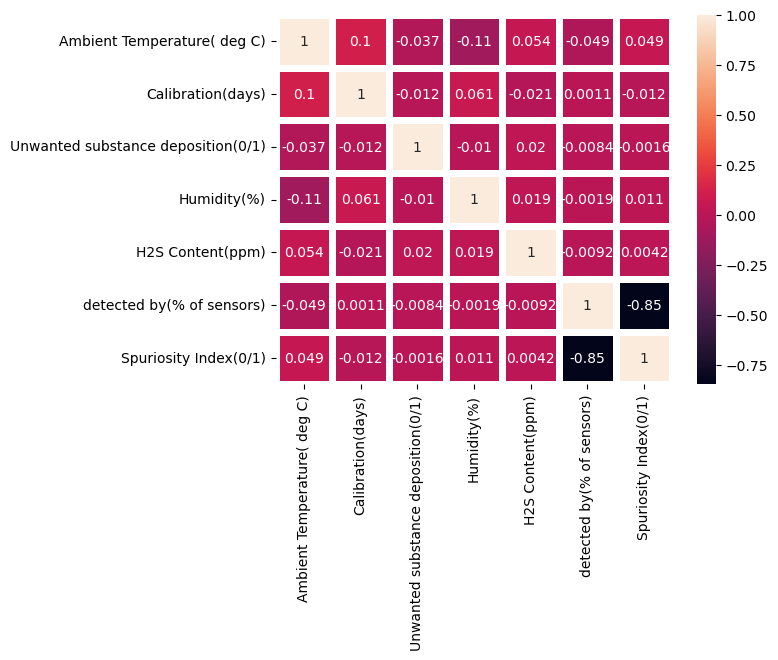

In [74]:
sns.heatmap(df.corr(),annot=True,linecolor='white',linewidth=5)
plt.show()

In [75]:
df.isnull().sum()

Ambient Temperature( deg C)           0
Calibration(days)                     0
Unwanted substance deposition(0/1)    0
Humidity(%)                           0
H2S Content(ppm)                      0
detected by(% of sensors)             0
Spuriosity Index(0/1)                 0
dtype: int64

In [76]:
df.describe()

,Ambient Temperature( deg C),Calibration(days),Unwanted substance deposition(0/1),Humidity(%),H2S Content(ppm),detected by(% of sensors),Spuriosity Index(0/1)
count,1892.000000,1892.000000,1892.000000,1892.000000,1892.000000,1892.000000,1892.000000
mean,3.449789,131.633192,0.482030,82.513214,5.532241,71.610465,0.173890
std,3.323731,67.741005,0.499809,7.659900,2.271502,21.203802,0.379115
min,-2.000000,10.000000,0.000000,69.000000,2.000000,20.000000,0.000000
25%,1.000000,75.000000,0.000000,76.000000,4.000000,63.000000,0.000000
50%,3.000000,133.000000,0.000000,82.000000,6.000000,76.000000,0.000000
75%,6.000000,188.000000,1.000000,89.000000,8.000000,88.000000,0.000000
max,9.000000,250.000000,1.000000,96.000000,9.000000,100.000000,1.000000


In [77]:
df.corr()

,Ambient Temperature( deg C),Calibration(days),Unwanted substance deposition(0/1),Humidity(%),H2S Content(ppm),detected by(% of sensors),Spuriosity Index(0/1)
Ambient Temperature( deg C),1.000000,0.104659,-0.036992,-0.105782,0.053588,-0.049475,0.048690
Calibration(days),0.104659,1.000000,-0.011956,0.061244,-0.021214,0.001081,-0.011579
Unwanted substance deposition(0/1),-0.036992,-0.011956,1.000000,-0.010367,0.019841,-0.008420,-0.001640
Humidity(%),-0.105782,0.061244,-0.010367,1.000000,0.018789,-0.001910,0.011318
H2S Content(ppm),0.053588,-0.021214,0.019841,0.018789,1.000000,-0.009165,0.004233
detected by(% of sensors),-0.049475,0.001081,-0.008420,-0.001910,-0.009165,1.000000,-0.849136
Spuriosity Index(0/1),0.048690,-0.011579,-0.001640,0.011318,0.004233,-0.849136,1.000000


In [78]:
df.head()

,Ambient Temperature( deg C),Calibration(days),Unwanted substance deposition(0/1),Humidity(%),H2S Content(ppm),detected by(% of sensors),Spuriosity Index(0/1)
0,-2,226,1,96,9,21,1
1,4,134,1,83,4,77,0
2,7,163,0,69,2,81,0
3,5,162,0,80,6,69,0
4,2,192,1,87,3,67,0


In [79]:
#Step-3- Split the data in x and y axis veriables - 
x=df.drop('Spuriosity Index(0/1)',axis=1)
y=df['Spuriosity Index(0/1)']

In [80]:
print(x.shape)
print(y.shape)

(1892, 6)
(1892,)


In [81]:
#Step-4- Create object for the algorithm -
from sklearn.model_selection import cross_val_score

In [82]:
#Lets do the CrossValidation - By using Logistic_Regression_Classifier Algorithm
from sklearn.linear_model import LogisticRegression
logr=LogisticRegression()
cross_val_score(logr,x,y,cv=10,scoring='accuracy').mean()

C:\Users\om\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.998418267891952

In [83]:
#Lets do the CrossValidation - By using K-Nearest-Neighbors_Classifier Algorithm
from sklearn.neighbors import KNeighborsClassifier
knnc=KNeighborsClassifier(n_neighbors=3)
cross_val_score(knnc,x,y,cv=10,scoring='accuracy').mean()

0.9989473684210527

In [84]:
#Lets do the CrossValidation - By using Decision_Tree_Classifier Algorithm
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
cross_val_score(dtc,x,y,cv=10,scoring='accuracy').mean()

0.9973600668337511

In [85]:
#Lets do the CrossValidation - By using Random_forests_Classifier Algorithm
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=10)
cross_val_score(rfc,x,y,cv=10,scoring='accuracy').mean()

0.9989473684210527

In [86]:
#Lets do the CrossValidation - By using Support_Vector_Machine_Classifier Algorithm
from sklearn.svm import SVC
svmc=SVC()
cross_val_score(svmc,x,y,cv=10,scoring='accuracy').mean()

0.9989473684210527

In [87]:
#Lets do the CrossValidation - By using Naive_Bayes_Classifier Algorithm
from sklearn.naive_bayes import GaussianNB
gnbc=GaussianNB()
cross_val_score(gnbc,x,y,cv=10,scoring='accuracy').mean()

0.9994736842105263

In [88]:
#Lets do the CrossValidation - By using Naive_Bayes_Classifier Algorithm
from sklearn.naive_bayes import BernoulliNB
bnbc=BernoulliNB()
cross_val_score(bnbc,x,y,cv=10,scoring='accuracy').mean()

0.8261097187412976

In [89]:
#Lets do the CrossValidation - By using Linear_Regression_Classifier Algorithm
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
cross_val_score(lr,x,y,cv=10,scoring=None).mean()

0.7184039755338822

In [90]:
#Accoracy_Scores : lr=71.84%,logr=99.89%,knnc=99.89%,dtc=99.84%,rfc=99.84%,svmv=99.94%,gnbc=99.94%,bnbc=82.61%

In [107]:
#Lets Support_Vector_Machine_Classifier Algorithm as this is giving Highest Accuracy - 
from sklearn.svm import SVC
svmc=SVC()
svmc.fit(x,y)
import joblib
joblib.dump(svmc, 'train_md9.pkl')

['train_md9.pkl']

In [108]:
#Lets Evaluate the Model -
predict_svmc=svmc.predict(x)
from sklearn.metrics import accuracy_score
print(accuracy_score(y,predict_svmc))
print(predict_svmc)

0.9989429175475687
[1 0 0 ... 0 1 1]


In [93]:
#Project-9-lets Deploy False Alarm Detection Model End_to_End. -